In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# crear un folder para guardar los datos
import os
FOLDER = "data"
if not os.path.exists(FOLDER):
    os.mkdir(FOLDER)

# Pandas

## 1. Crear un archivo csv con el siguiente contenido.

In [7]:
data = {
    "marca": ["Seat", "Seat", "VW", "Opel", "VW", "Seat", "VW", "Opel", "Seat", "Seat", "Opel", "Opel", "Seat", "Opel", "Opel"],
    "modelo": ["Ibiza", "Ibiza", "Polo", "Corsa", "Golf", "Arona", "Polo", "Corsa", "Leon", "Arona", "Corsa", "Corsa", "Ibiza", "Astra", "Corsa"],
    "cilindrada": [1400, 1400, 1600, 1400, 1600, 1600, 2000, 2000, 2000, 1800, 1800, 1800, 1600, 1800, 1800],
    "kms": [59979, 29707, 84461, 98292, 93720, 90083, 57076, 42932, 70544, 52457, 75277, 63751, 24698, 47881, 77320],
    "precio": [7728, 16691, 6638, 11695, 10642, 14982, 14271, 18689, 7874, 8003, 7230, 17087, 11870, 6114, 6239],
    "año": [2021, 2011, 2010, 2018, 2022, 2021, 2014, 2014, 2013, 2013, 2022, 2018, 2022, 2013, 2022]
}

In [8]:
df = pd.DataFrame(data)
csv_path = os.path.join(FOLDER, "vehiculos.csv")
df.to_csv(csv_path, index=False) # Guardar el archivo CSV

## 2. Leer el archivo CSV y obtener información

In [9]:
df = pd.read_csv(csv_path)
num_elements = df.shape[0] * df.shape[1]  # Número total de elementos
num_columns = df.shape[1]  # Número de columnas
nombre_columns = df.columns.tolist()  # Nombre de las columnas

## 3. Mostrar las 5 primeras filas solo con la marca y el modelo

In [10]:
rows = df.loc[:4, ["marca", "modelo"]]
print(rows) # Mostrar las 5 primeras filas solo con la marca y el modelo

# -- (se puede hacer con el método "head" tambien)
rows = df[["marca", "modelo"]]
print(rows.head(5))

  marca modelo
0  Seat  Ibiza
1  Seat  Ibiza
2    VW   Polo
3  Opel  Corsa
4    VW   Golf
  marca modelo
0  Seat  Ibiza
1  Seat  Ibiza
2    VW   Polo
3  Opel  Corsa
4    VW   Golf


## 4. Obtener cuántas marcas diferentes hay y cuáles son

In [11]:
unique_brands = df["marca"].unique()
num_brands = len(unique_brands)

print(unique_brands) # Marcas diferentes
print(num_brands) # Número de marcas diferentes

['Seat' 'VW' 'Opel']
3


## 5. Mostrar solo las filas de la marca Opel

In [12]:
df_opel = df[df["marca"] == "Opel"]
print(df_opel) # Filas de la marca Opel

   marca modelo  cilindrada    kms  precio   año
3   Opel  Corsa        1400  98292   11695  2018
7   Opel  Corsa        2000  42932   18689  2014
10  Opel  Corsa        1800  75277    7230  2022
11  Opel  Corsa        1800  63751   17087  2018
13  Opel  Astra        1800  47881    6114  2013
14  Opel  Corsa        1800  77320    6239  2022


## 6. Calcular los kms promedio de cada marca

In [13]:
brands = df["marca"].unique()
average_kms_per_brand = {brand: np.mean(df[df["marca"] == brand]["kms"]) for brand in brands}

print(average_kms_per_brand)

{'Seat': np.float64(54578.0), 'VW': np.float64(78419.0), 'Opel': np.float64(67575.5)}


El objetivo del ejercicio 6 es calcular el kilometraje promedio de los coches para cada marca en el conjunto de datos. Para ello, en la primera solución usamos un diccionario pero se puede usar tambien el método groupby() de Pandas, que nos permite agrupar los datos por la columna de la marca y luego aplicar la función mean() sobre la columna de kilómetros.

In [14]:
df_group_by_marca = df.groupby("marca")

In [15]:
kms_average_by_brand = df_group_by_marca["kms"].mean()
print(kms_average_by_brand) # Kms promedio por marca

marca
Opel    67575.5
Seat    54578.0
VW      78419.0
Name: kms, dtype: float64


Explicación paso por paso

1. groupby("marca") agrupa el conjunto de datos en tres categorías según las marcas encontradas en la columna "marca".
Internamente, Pandas crea subconjuntos de datos, agrupando todas las filas que corresponden a una misma marca.
Selección de la columna "kms" (["kms"])

2. Después de agrupar los datos por marca, seleccionamos la columna "kms", ya que queremos calcular el promedio de los kilómetros recorridos.Cálculo del promedio (mean())

3. Aplicamos la función mean() sobre la columna "kms", lo que significa que Pandas calculará el promedio de los valores de kilometraje dentro de cada grupo (marca).

## 7. Sumar 1000 euros a los vehículos de año posterior a 2015

In [16]:
df_copy = df.copy() # Copiar el dataframe para no modificar el original

print(df_copy) # Mostrar el dataframe original

   marca modelo  cilindrada    kms  precio   año
0   Seat  Ibiza        1400  59979    7728  2021
1   Seat  Ibiza        1400  29707   16691  2011
2     VW   Polo        1600  84461    6638  2010
3   Opel  Corsa        1400  98292   11695  2018
4     VW   Golf        1600  93720   10642  2022
5   Seat  Arona        1600  90083   14982  2021
6     VW   Polo        2000  57076   14271  2014
7   Opel  Corsa        2000  42932   18689  2014
8   Seat   Leon        2000  70544    7874  2013
9   Seat  Arona        1800  52457    8003  2013
10  Opel  Corsa        1800  75277    7230  2022
11  Opel  Corsa        1800  63751   17087  2018
12  Seat  Ibiza        1600  24698   11870  2022
13  Opel  Astra        1800  47881    6114  2013
14  Opel  Corsa        1800  77320    6239  2022


In [17]:
df_copy.loc[df["año"] > 2015, "precio"] += 1000 # Aumentar 1000 al precio de los coches con año mayor a 2015

print(df_copy) # Mostrar los resultados

   marca modelo  cilindrada    kms  precio   año
0   Seat  Ibiza        1400  59979    8728  2021
1   Seat  Ibiza        1400  29707   16691  2011
2     VW   Polo        1600  84461    6638  2010
3   Opel  Corsa        1400  98292   12695  2018
4     VW   Golf        1600  93720   11642  2022
5   Seat  Arona        1600  90083   15982  2021
6     VW   Polo        2000  57076   14271  2014
7   Opel  Corsa        2000  42932   18689  2014
8   Seat   Leon        2000  70544    7874  2013
9   Seat  Arona        1800  52457    8003  2013
10  Opel  Corsa        1800  75277    8230  2022
11  Opel  Corsa        1800  63751   18087  2018
12  Seat  Ibiza        1600  24698   12870  2022
13  Opel  Astra        1800  47881    6114  2013
14  Opel  Corsa        1800  77320    7239  2022


<!-- # 3. Mostrar las 5 primeras filas solo con la marca y el modelo -->

# Numpy

## 1. Crear un vector de tamaño 10 de ceros excepto el quinto elemento que será 1


In [18]:
vector_zeros = np.zeros(10)
vector_zeros[4] = 1
print(vector_zeros)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Explicación:
* np.zeros(10) → Crea un vector de tamaño 10 con todos los valores en 0.
* vector_zeros[4] = 1 → Cambia el quinto elemento (índice 4) a 1.

## 2. Crear un vector con valores entre 10 y 49


In [19]:
vector_range = np.arange(10, 50)
print(vector_range)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


Explicación:
* np.arange(10, 50) → Genera un vector con valores desde 10 hasta 49 (el último valor no se incluye)

## 3. Crear una matriz de 3x3 con valores entre 0 y 8

In [20]:
matrix_3x3 = np.random.randint(0, 9, (3, 3))
print(matrix_3x3)

[[1 7 0]
 [1 5 6]
 [8 1 1]]


## 4. Crear una matriz identidad de dimensiones 4x4


In [21]:
identity_matrix_4x4 = np.eye(4)
print(identity_matrix_4x4)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Explicación:
* np.eye(4) → Genera una matriz identidad de 4x4.
* En una matriz identidad, la diagonal principal tiene valores 1 y el resto son 0.

## 5. Crear un array de dimensiones 3x3x3 con valores aleatorios

In [22]:
random_array_3x3x3 = np.random.rand(3, 3, 3)
print(random_array_3x3x3.shape)

(3, 3, 3)


## 6. Crear una matriz de 5x5 con 1 en los bordes y 0 en el interior

In [23]:
border_matrix_5x5 = np.ones((5, 5))
border_matrix_5x5[1:-1, 1:-1] = 0
print(border_matrix_5x5)

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


Explicación:
* np.ones((5, 5)) → Crea una matriz de 5x5 con valores 1 en todas las posiciones.
* border_matrix_5x5[1:-1, 1:-1] = 0 → Cambia los valores internos a 0, dejando los bordes en 1.

## 7. Crear un vector de tamaño 10 con valores aleatorios y modificar el valor máximo por 0

In [24]:
random_vector_10 = np.random.rand(10)
random_vector_10[np.argmax(random_vector_10)] = 0 # Cambiar el valor máximo por 0
print(random_vector_10)

[0.014766   0.1875259  0.05404396 0.51437718 0.29871338 0.17025954
 0.47491924 0.4363661  0.         0.32677088]


Explicación:
* np.random.rand(10) → Genera un vector de tamaño 10 con valores aleatorios entre 0 y 1.
* np.argmax(random_vector_10) → Encuentra el índice del valor máximo.
* random_vector_10[np.argmax(random_vector_10)] = 0 → Cambia el valor máximo a 0.


## 8. Encontrar el valor más próximo a un escalar dado en un vector

In [25]:
scalar = 25  # Escalar dado
vector_example = np.random.randint(0, 50, 10)  # Vector con valores aleatorios entre 0 y 50
closest_value = vector_example[np.abs(vector_example - scalar).argmin()]

print(f"Vector: {vector_example}")
print(f"Valor más cercano a {scalar}: {closest_value}")


Vector: [ 2 37 41 47 44 13 14  8 15 35]
Valor más cercano a 25: 15


Explicación:
* np.random.randint(0, 50, 10) → Genera un vector de 10 valores enteros aleatorios entre 0 y 50.
* np.abs(vector_example - scalar) → Calcula la diferencia absoluta entre cada valor del vector y el escalar dado.
* .argmin() → Encuentra el índice del valor más cercano.
* vector_example[...] → Recupera el valor más cercano

# Matplotlib

## 1 Dibujar la función f(x) = 1 / (x² + 1) en el intervalo [-10,10]

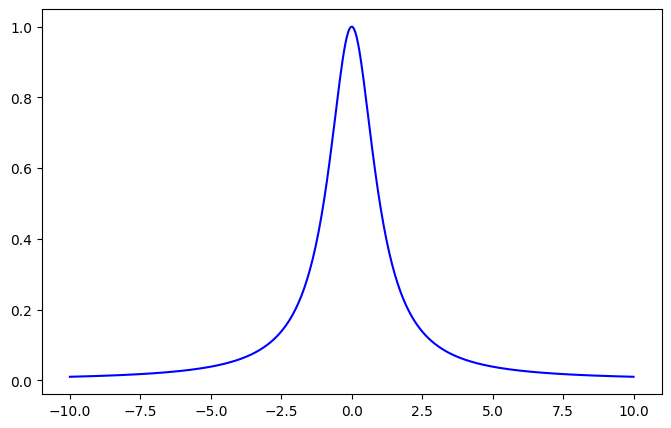

In [26]:
# 1. Generar los valores de x en el intervalo [-10, 10]
x = np.linspace(-10, 10, 400)  # 400 puntos equidistantes

# 2. Calcular los valores de f(x)
f_x1 = 1 / (x**2 + 1)

# 3. Dibujar la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, f_x1, color='blue')
plt.show()

### 2. Añadir una rejilla a la gráfica anterior y poner nombre a los ejes

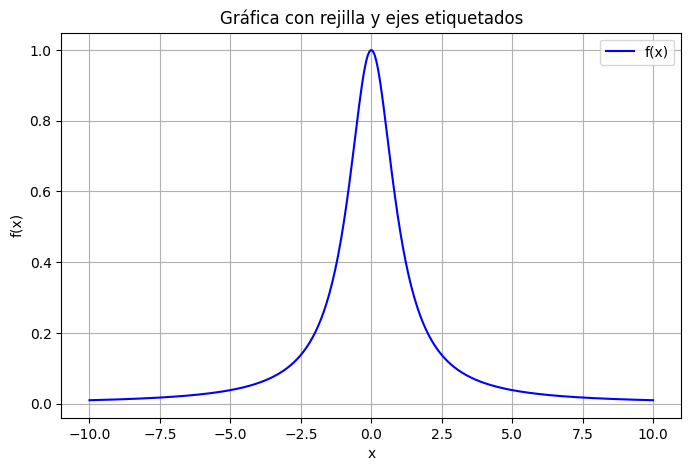

In [27]:

plt.figure(figsize=(8, 5))
plt.plot(x, f_x1, label='f(x)', color='blue') # label es la etiqueta de la función
plt.grid(True)  # Activar rejilla
plt.xlabel("x")  # Etiqueta del eje x
plt.ylabel("f(x)")  # Etiqueta del eje y
# Extras para dejar las cosas bonitas
plt.title("Gráfica con rejilla y ejes etiquetados") # Título de la gráfica
plt.legend() # Mostrar la leyenda. aka la etiqueta de la función
plt.show()

## 3 Dibujar también la función f(x) = 1 / (e^(-x) + 1) en color rojo

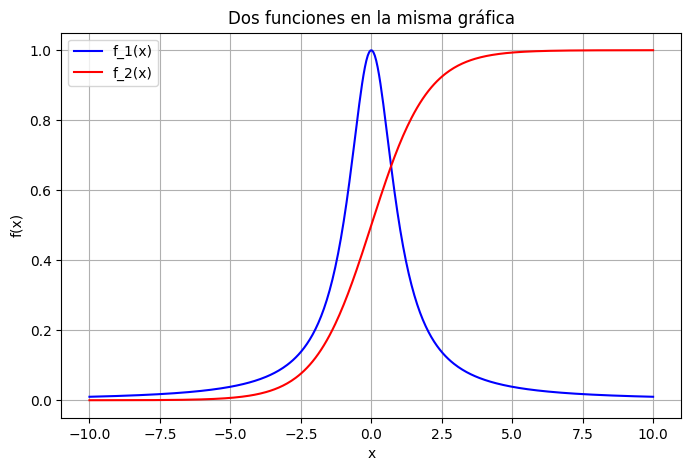

In [28]:
# 1. Calcular la segunda función f(x) = 1 / (e^(-x) + 1)
f_x2 = 1 / (np.exp(-x) + 1) 
# a esta funcion se le llama sigmoide, spoiler: es la función de activación de la regresión logística, ya lo veremos en el futuro...

# 2. Dibujar ambas funciones en la misma gráfica
plt.figure(figsize=(8, 5)) # Tamaño de la gráfica
plt.plot(x, f_x1, label='f_1(x)', color='blue')
plt.plot(x, f_x2, label='f_2(x)', color='red') # Dibujar la segunda función
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Dos funciones en la misma gráfica")
plt.legend()
plt.show()

## 4. Dibujar un diagrama de dispersión de kms vs precio de vehículos

In [29]:
cars_df = pd.read_csv(csv_path)
cars_df 

,marca,modelo,cilindrada,kms,precio,año
0,Seat,Ibiza,1400,59979,7728,2021
1,Seat,Ibiza,1400,29707,16691,2011
2,VW,Polo,1600,84461,6638,2010
3,Opel,Corsa,1400,98292,11695,2018
4,VW,Golf,1600,93720,10642,2022
5,Seat,Arona,1600,90083,14982,2021
6,VW,Polo,2000,57076,14271,2014
7,Opel,Corsa,2000,42932,18689,2014
8,Seat,Leon,2000,70544,7874,2013
9,Seat,Arona,1800,52457,8003,2013


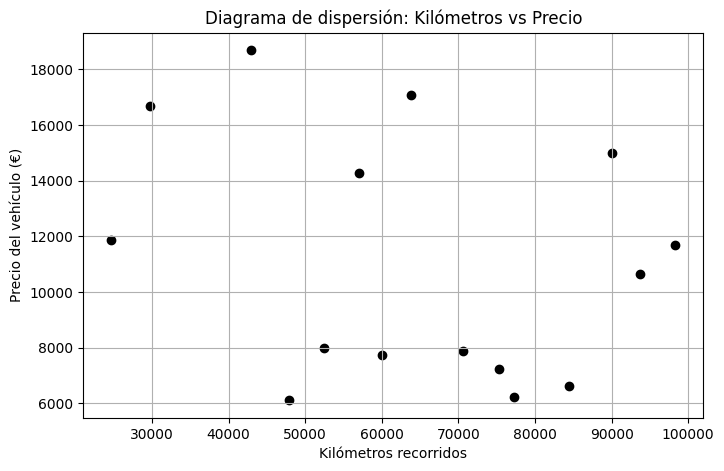

In [30]:
# Dibujar scatter plot (kms en x, precio en y)
plt.figure(figsize=(8, 5))
plt.scatter(cars_df["kms"], cars_df["precio"], color="black")
plt.xlabel("Kilómetros recorridos")
plt.ylabel("Precio del vehículo (€)")
plt.title("Diagrama de dispersión: Kilómetros vs Precio")
plt.grid(True)
plt.show()

## 5. Dibujar un diagrama de barras con el número de vehículos de cada marca

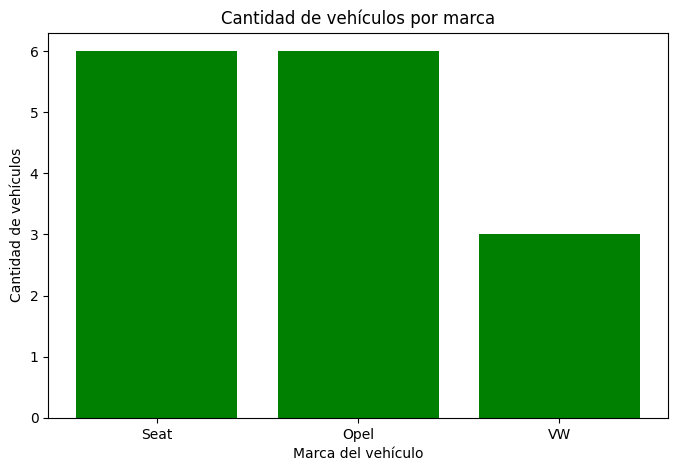

In [31]:
# Contar el número de vehículos por marca
vehicle_counts = cars_df["marca"].value_counts()

# Dibujar el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(vehicle_counts.index, vehicle_counts.values, color="green")  # Barras en color verde
plt.xlabel("Marca del vehículo")
plt.ylabel("Cantidad de vehículos")
plt.title("Cantidad de vehículos por marca")
plt.show()

* Contar la cantidad de coches por marca
* df_vehicles["marca"].value_counts(): Cuenta cuántos coches hay de cada marca.
* Dibujar el diagrama de barras: plt.bar(vehicle_counts.index, vehicle_counts.values, color="green"):
* Se asigna el color verde a las barras.
* Etiquetar los ejes
* Se añade el título y las etiquetas de ejes.